In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fd = pd.read_csv('Facebook_Marketplace_data.csv', encoding='latin-1')

In [4]:
fds = fd.dropna(axis=1, how='all')
rows,columns = fds.shape
print(rows,columns)

7050 12


In [5]:
print(fd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [6]:
print(fd.describe())

         status_id  num_reactions  num_comments   num_shares    num_likes  \
count  7050.000000    7050.000000   7050.000000  7050.000000  7050.000000   
mean   3525.500000     230.117163    224.356028    40.022553   215.043121   
std    2035.304031     462.625309    889.636820   131.599965   449.472357   
min       1.000000       0.000000      0.000000     0.000000     0.000000   
25%    1763.250000      17.000000      0.000000     0.000000    17.000000   
50%    3525.500000      59.500000      4.000000     0.000000    58.000000   
75%    5287.750000     219.000000     23.000000     4.000000   184.750000   
max    7050.000000    4710.000000  20990.000000  3424.000000  4710.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  \
count  7050.000000  7050.000000  7050.000000  7050.000000  7050.000000   
mean     12.728652     1.289362     0.696454     0.243688     0.113191   
std      39.972930     8.719650     3.957183     1.597156     0.726812   
min       

In [7]:
print(fd.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


#1.	How does the time of upload ('status_published') affects the 'num_reaction' ?

<ipython-input-8-388a7d9969cf>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_Category', y='num_reactions', data=relation_melted, palette="viridis")


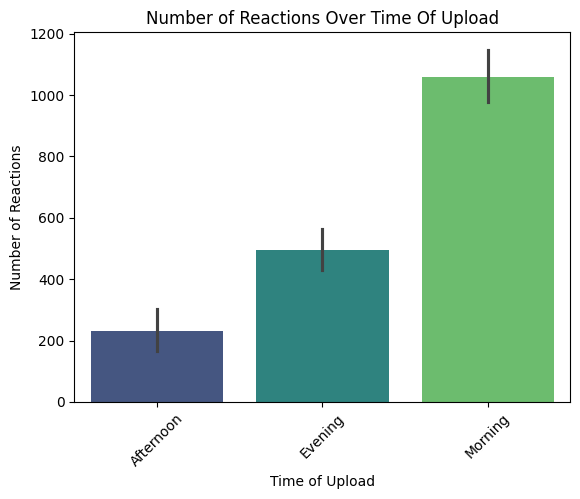

In [8]:
from datetime import time

fd['status_published'] = pd.to_datetime(fd['status_published'])
fd['date'] = fd['status_published'].dt.date
fd['time'] = fd['status_published'].dt.time

def categorize_time(t):
    if time(0, 0) <= t < time(12, 0):
        return 'Morning'
    elif time(12, 0) <= t < time(15, 0):
        return 'Afternoon'
    elif time(15, 0) <= t <= time(23, 59):
        return 'Evening'
    else:
        return 'Unknown'

fd['Time_Category'] = fd['time'].apply(categorize_time)
relation = fd.groupby(['Time_Category','date'])['num_reactions'].sum().unstack()
relation_reset = relation.reset_index()
relation_melted = relation_reset.melt(id_vars='Time_Category', var_name='date', value_name='num_reactions')

sns.barplot(x='Time_Category', y='num_reactions', data=relation_melted, palette="viridis")
plt.xlabel('Time of Upload')
plt.ylabel('Number of Reactions')
plt.title('Number of Reactions Over Time Of Upload')
plt.xticks(rotation=45)
plt.show()

#2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [9]:
correlation_matrix = fd[['num_reactions', 'num_comments', 'num_shares']].corr()
print(correlation_matrix)

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


#3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

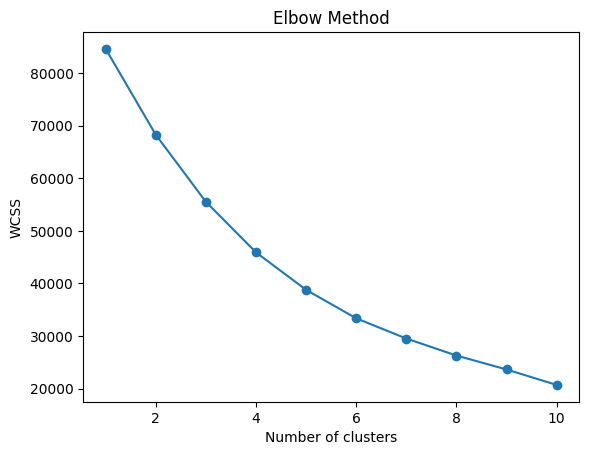

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  status_type_photo  status_type_status  \
0          1         1           0              False               False   
1          0         0           0               True               False   
2          1         0           0              False               False   
3          0         0           0               True               False   
4          0         0           0               True               False   

   status_type_video  Cluster  
0               True        2  
1   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data = fd[columns]

data = pd.get_dummies(data, columns=['status_type'], drop_first=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows of the data with the cluster labels
print(data.head())


#4. Use the elbow method to find the optimum number of clusters.

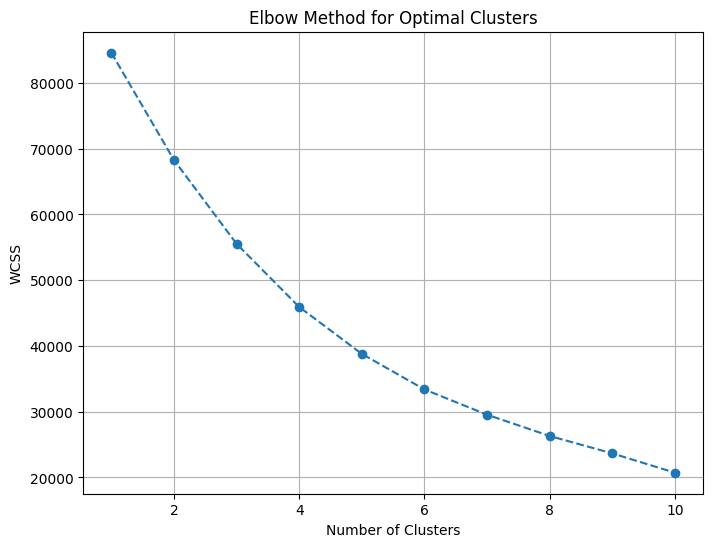

In [11]:
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data = fd[columns]

data = pd.get_dummies(data, columns=['status_type'], drop_first=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#5. What is the count of different types of posts in the dataset?

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


<ipython-input-12-7981a12c3e37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='plasma')


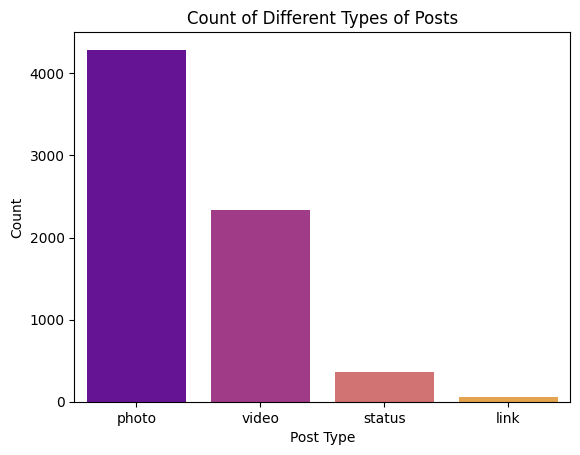

In [12]:
post_type_counts = fd['status_type'].value_counts()
print(post_type_counts)
sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='plasma')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Count of Different Types of Posts')
plt.show()


#6. What is the average value of num_reaction, num_comments, num_shares for each post type?

In [13]:
avg_values = fd.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().round()
print(avg_values)


             num_reactions  num_comments  num_shares
status_type                                         
link                 370.0           6.0         4.0
photo                181.0          16.0         3.0
status               439.0          36.0         3.0
video                283.0         642.0       116.0


#Extra Insights

In [14]:
# Finding the minimum and maximum dates
min_date = fd['status_published'].min()
max_date = fd['status_published'].max()

print(f"Time range of posts: {min_date} to {max_date}")


Time range of posts: 2012-07-15 02:51:00 to 2018-06-13 01:12:00


<ipython-input-15-171657a00dff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reactions_by_type.index, y=total_reactions_by_type.values, palette='viridis')


Text(0.5, 1.0, 'Total Reactions by Post Type')

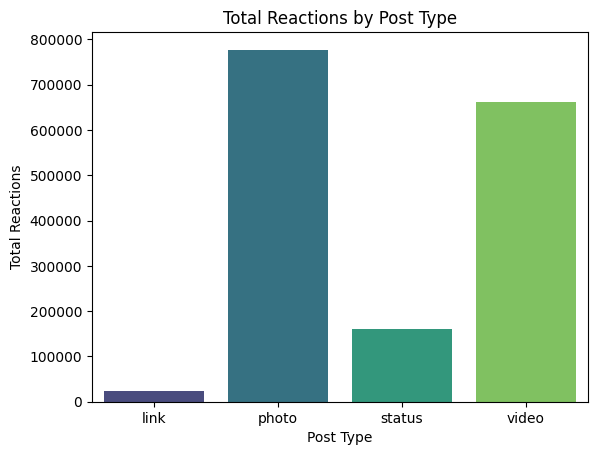

In [15]:
total_reactions_by_type = fd.groupby('status_type')['num_reactions'].sum()
sns.barplot(x=total_reactions_by_type.index, y=total_reactions_by_type.values, palette='viridis')
plt.xlabel('Post Type')
plt.ylabel('Total Reactions')
plt.title('Total Reactions by Post Type')


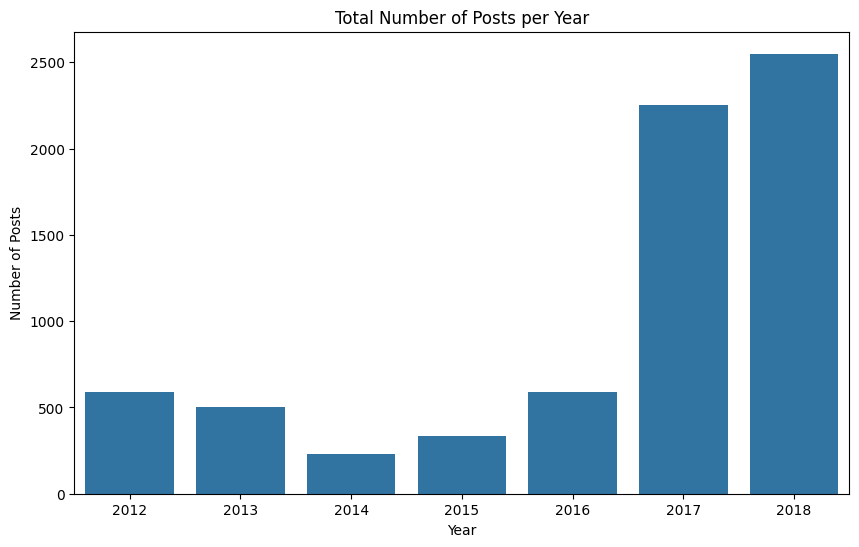

In [16]:
fd['year'] = fd['status_published'].dt.year

posts_per_year = fd['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=posts_per_year.index, y=posts_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Total Number of Posts per Year')
plt.show()

In [17]:
react_dist = fd.groupby('status_type')[['num_likes', 'num_hahas', 'num_wows', 'num_sads', 'num_angrys']].sum()
print(react_dist)


             num_likes  num_hahas  num_wows  num_sads  num_angrys
status_type                                                      
link             23286          2        12         0           0
photo           766602        818      2936       611         196
status          158968         40       428       141           9
video           567198       4050      5714       966         593
